In [6]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [70]:
df = pd.read_csv("Google_Trends_combined_allyears_IH.csv")
df.head()

Unnamed: 0 ILI_weeks  a_influenza  acute_bronchitis  body_temperature  \
0           0    2004_1           11                50                58   
1           1    2004_2            7                41                70   
2           2    2004_3            6                40                53   
3           3    2004_4            4                32                57   
4           4    2004_5            3                31                46   

   braun_thermoscan  break_a_fever  bronchitis  chest_cold  cold_and_flu  ...  \
0               100             15          34          27            26  ...   
1                54             12          31          17            20  ...   
2                40             15          29          20            16  ...   
3                26             18          25          21            12  ...   
4                80             21          25           9            10  ...   

   what_to_do_if_you_have_the_flu  Flu_Visit_Count  ILI_Visit_Count  \
0                               0              NaN              NaN   
1                               0              NaN              NaN   
2                               0              NaN              NaN   
3                               0              NaN              NaN   
4                               0              NaN              NaN   

   Unspecified  Unweighted_ILI    Label  ILI_lagwk1  ILI_lagwk2  ILI_lagwk3  \
0          NaN         2.41833  2.41833     1.80906     1.71202     1.54250   
1          NaN         1.80906  1.80906     1.71202     1.54250     1.43787   
2          NaN         1.71202  1.71202     1.54250     1.43787     1.32427   
3          NaN         1.54250  1.54250     1.43787     1.32427     1.30726   
4          NaN         1.43787  1.43787     1.32427     1.30726     1.03698   

   ILI_lagwk4  
0     1.43787  
1     1.32427  
2     1.30726  
3     1.03698  
4     1.01032  

[5 rows x 140 columns]

In [71]:
g_trend = df.drop(['Flu_Visit_Count', 'ILI_Visit_Count', 'Unspecified'], axis=1)
g_trend.head()

Unnamed: 0 ILI_weeks  a_influenza  acute_bronchitis  body_temperature  \
0           0    2004_1           11                50                58   
1           1    2004_2            7                41                70   
2           2    2004_3            6                40                53   
3           3    2004_4            4                32                57   
4           4    2004_5            3                31                46   

   braun_thermoscan  break_a_fever  bronchitis  chest_cold  cold_and_flu  ...  \
0               100             15          34          27            26  ...   
1                54             12          31          17            20  ...   
2                40             15          29          20            16  ...   
3                26             18          25          21            12  ...   
4                80             21          25           9            10  ...   

   type_a_influenza  upper_respiratory  walking_pneumonia  \
0                20                 37                 57   
1                16                 21                 42   
2                16                 17                 38   
3                16                 24                 45   
4                18                 25                 26   

   what_to_do_if_you_have_the_flu  Unweighted_ILI    Label  ILI_lagwk1  \
0                               0         2.41833  2.41833     1.80906   
1                               0         1.80906  1.80906     1.71202   
2                               0         1.71202  1.71202     1.54250   
3                               0         1.54250  1.54250     1.43787   
4                               0         1.43787  1.43787     1.32427   

   ILI_lagwk2  ILI_lagwk3  ILI_lagwk4  
0     1.71202     1.54250     1.43787  
1     1.54250     1.43787     1.32427  
2     1.43787     1.32427     1.30726  
3     1.32427     1.30726     1.03698  
4     1.30726     1.03698     1.01032  

[5 rows x 137 columns]

In [72]:
g_trend = df.dropna()
g_trend.tail()

Unnamed: 0 ILI_weeks  a_influenza  acute_bronchitis  body_temperature  \
640         640   2016_18           14                55                64   
641         641   2016_19           11                58                58   
642         642   2016_20            9                58                59   
643         643   2016_21            8                54                58   
644         644   2016_22            6                47                53   

     braun_thermoscan  break_a_fever  bronchitis  chest_cold  cold_and_flu  \
640                40             33          45          39            24   
641                27             30          43          37            24   
642                25             30          42          36            21   
643                32             27          40          38            23   
644                31             28          38          34            21   

     ...  what_to_do_if_you_have_the_flu  Flu_Visit_Count  ILI_Visit_Count  \
640  ...                              18          0.00455          0.00799   
641  ...                               6          0.00305          0.00634   
642  ...                               6          0.00211          0.00548   
643  ...                               8          0.00156          0.00467   
644  ...                               5          0.00124          0.00449   

     Unspecified  Unweighted_ILI    Label  ILI_lagwk1  ILI_lagwk2  ILI_lagwk3  \
640      0.01321         1.62581  1.62581     1.48887     1.45832     1.44250   
641      0.01139         1.48887  1.48887     1.45832     1.44250     1.38886   
642      0.01022         1.45832  1.45832     1.44250     1.38886     1.19484   
643      0.00928         1.44250  1.44250     1.38886     1.19484     1.13307   
644      0.00887         1.38886  1.38886     1.19484     1.13307     1.07306   

     ILI_lagwk4  
640     1.38886  
641     1.19484  
642     1.13307  
643     1.07306  
644     1.11411  

[5 rows x 140 columns]

In [52]:
from sklearn.model_selection import train_test_split

Train=g_trend.loc[1:550, :]
X_train=Train.iloc[:,1:130]
y_train=Train.iloc[:,131]
Test=g_trend.loc[551:645,:]
X_test=Test.iloc[:,1:130]
y_test=Test.iloc[:,131]

In [63]:
from sklearn import *
import random
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
coefficients = np.random.randn(129)
lm = LinearRegression()
ridge = linear_model.Ridge(alpha = 0.1)
lasso = linear_model.Lasso(alpha = 0.1)
e_net = linear_model.ElasticNet(alpha=1, l1_ratio=0.5)



In [64]:
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
e_net.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
prediction_ridge = ridge.predict(X_test)
prediction_lasso = lasso.predict(X_test)
prediction_enet = e_net.predict(X_test)
print(prediction_ridge)
print(prediction_lasso)
print(prediction_enet)

[ 6.83919984e-04  1.27151552e-03  1.47956073e-03  2.89170666e-03
  8.35113884e-04  1.11991771e-03  1.55688693e-03  1.59423882e-03
  2.41682072e-03  5.65186839e-03  2.16765788e-03  4.28558166e-03
  3.00049804e-03  4.51970488e-03  6.29579488e-03  1.09451373e-02
  1.11442806e-02  1.92257067e-02  3.55133302e-02  4.69773341e-02
  3.32550556e-02  2.10336608e-02  2.38664022e-02  2.01981707e-02
  1.65962925e-02  1.33723356e-02  1.04227068e-02  1.10392591e-02
  1.01146956e-02  7.67023523e-03  1.02200321e-02  9.13080078e-03
  6.82187551e-03  7.58976075e-03  8.26068804e-03  4.32288474e-03
  2.91701207e-03  2.02972986e-03  9.95961748e-04 -5.81756651e-04
  1.29366425e-03  2.50305565e-03  1.51722100e-03  6.13516193e-04
  1.39430724e-03  1.55861610e-03  8.28553678e-04  1.42448631e-03
 -8.10575297e-05  7.68780875e-05 -8.49121654e-04  3.10467944e-05
  9.92572118e-04  8.20433468e-04  1.09476158e-03 -4.79936188e-04
  1.83613105e-03  5.99769195e-04  1.01594988e-03 -4.41107219e-04
 -3.35170675e-04  1.58152

In [66]:
score_ridge = metrics.r2_score(y_test,prediction_ridge)
score_lasso = metrics.r2_score(y_test,prediction_lasso)
score_enet = metrics.r2_score(y_test,prediction_enet)


In [67]:
print("R-Squared value for Ridge regression:",score_ridge)
print("R-Squared value for Lasso regression:",score_lasso)
print("R-squared value for Elastic-Net regression:",score_enet)

R-Squared value for Ridge regression: 0.9092909469738945
R-Squared value for Lasso regression: 0.06078464124196037
R-squared value for Elastic-Net regression: -0.021046893784275822


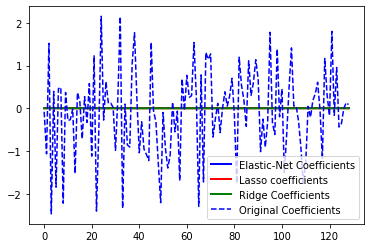

In [59]:
plt.plot(e_net.coef_, color='blue', linewidth=2,
         label='Elastic-Net Coefficients')
plt.plot(lasso.coef_, color='red', linewidth=2,
         label='Lasso coefficients')
plt.plot(ridge.coef_,color="green",linewidth=2,label="Ridge Coefficients")
plt.plot(coefficients, '--', color='blue', label='Original Coefficients')
plt.legend(loc='best')
plt.show()
